<a href="https://colab.research.google.com/github/palvgoya/master_kschool/blob/master/supervised_learning_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rezpe/datos_viz/master/house_prices.csv")
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df=df[df["TotalSF"]<6000]

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Data Preparation
X= df[['TotalSF']] # pandas DataFrame
y= df['SalePrice'] # pandas Series

In [3]:
X


,TotalSF
0,2566
1,2524
2,2706
3,2473
4,3343
...,...
1455,2600
1456,3615
1457,3492
1458,2156


In [4]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1455, dtype: int64

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3343


In [6]:
from sklearn.linear_model import LinearRegression



In [7]:
# Crear una instancia
reg= LinearRegression()

In [8]:
# Entrenar el modelo
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Prediccion
reg.predict([[1000],[3000]])

array([ 50217.33439988, 217799.90852957])

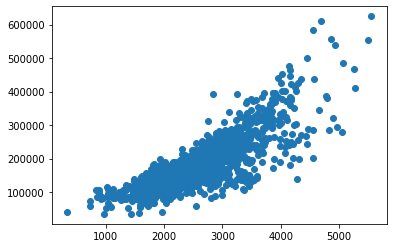

In [10]:
plt.scatter(X,y)

In [11]:
x_hip = np.linspace(500,6000)

In [12]:
x_hip

array([ 500.        ,  612.24489796,  724.48979592,  836.73469388,
        948.97959184, 1061.2244898 , 1173.46938776, 1285.71428571,
       1397.95918367, 1510.20408163, 1622.44897959, 1734.69387755,
       1846.93877551, 1959.18367347, 2071.42857143, 2183.67346939,
       2295.91836735, 2408.16326531, 2520.40816327, 2632.65306122,
       2744.89795918, 2857.14285714, 2969.3877551 , 3081.63265306,
       3193.87755102, 3306.12244898, 3418.36734694, 3530.6122449 ,
       3642.85714286, 3755.10204082, 3867.34693878, 3979.59183673,
       4091.83673469, 4204.08163265, 4316.32653061, 4428.57142857,
       4540.81632653, 4653.06122449, 4765.30612245, 4877.55102041,
       4989.79591837, 5102.04081633, 5214.28571429, 5326.53061224,
       5438.7755102 , 5551.02040816, 5663.26530612, 5775.51020408,
       5887.75510204, 6000.        ])

In [18]:
predictions= reg.predict(pd.DataFrame(x_hip))

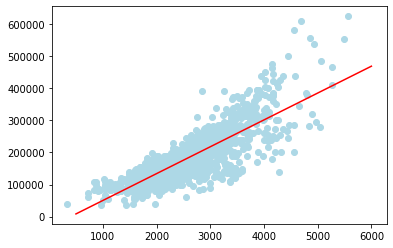

In [21]:
plt.scatter(X,y,c='lightblue')
plt.plot(x_hip, predictions,c='red')

In [22]:
#Pendiente
reg.coef_

array([83.79128706])

In [23]:
reg.intercept_

-33573.95266496137

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [28]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
predictions= reg.predict(X_test)

In [31]:
predictions[:5]

array([114528.4941373 , 145943.76160392, 143380.93715269,  45662.92098022,
       236634.67847465])

In [32]:
y_test[:5]

498     130000
1265    183900
411     145000
1049     84900
1036    315500
Name: SalePrice, dtype: int64

In [33]:
from sklearn.metrics import mean_absolute_error

In [35]:
#MAE
mean_absolute_error(reg.predict(X_test),y_test)

33687.645424627175

In [36]:
#MAPE
np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)

0.1987348040558154

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
# Llamamos al regresor
reg= KNeighborsRegressor(n_neighbors=20)

In [50]:
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [51]:
#MAE
mean_absolute_error(reg.predict(X_test),y_test)

32529.082876712328

In [52]:
#MAPE
np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)

0.18820648589053368

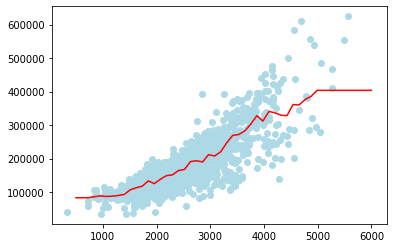

In [53]:
plt.scatter(X,y,c='lightblue')
plt.plot(x_hip, reg.predict(pd.DataFrame(x_hip)),c='red')

In [54]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(reg.predict(X_test),y_test))

47509.98980238081

In [55]:
# Hacemos Cross Validation para no tener que calcular varias veces y ver el error
from sklearn.model_selection import cross_val_score
# Creamos los dos modelos
regl= LinearRegression()
regk= KNeighborsRegressor(n_neighbors=5)


In [57]:
# Hacemos la Cross Validation de los dos modelos, en este caso para la Reg Lineal
cross_val_score(regl,X,y,scoring='neg_mean_absolute_error').mean()

-31053.225860573915

In [60]:
# Hacemos la Cross Validation de los dos modelos, en este caso para el K Neighbors
cross_val_score(regk,X,y,scoring='neg_mean_absolute_error').mean()

-32105.07298969072

In [59]:
# Por tanto la Regresion Lineal es mejor modelo

In [61]:
from sklearn.model_selection import GridSearchCV

In [63]:
reg = GridSearchCV(KNeighborsRegressor(),param_grid={'n_neighbors':np.arange(2,50)})
reg.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
reg.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                    weights='uniform')

In [65]:
from sklearn.tree import DecisionTreeRegressor


In [76]:
# Creamos la instancia
regd= DecisionTreeRegressor(max_depth=6, min_samples_leaf=50)

In [78]:
# Entrenar modelo
regd.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [79]:
cross_val_score(regd,X,y,scoring='neg_mean_squared_error').mean()

-1945876900.1676667

In [80]:
def corr (preds,real):
  return np.corrcoef(preds,real)[0][1]

In [81]:
corr(regd.predict(X_test),y_test)

0.8539871929014556

In [82]:
from sklearn.metrics import make_scorer
cross_val_score(regd,X,y,scoring=make_scorer(corr))

array([0.82063619, 0.85413094, 0.83483503, 0.81100252, 0.76291228])

In [108]:
regd_grid = GridSearchCV(DecisionTreeRegressor(),param_grid={'max_depth':np.arange(3,10),'min_samples_leaf':np.arange(20,1000,100)})
regd_grid.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 20, 120, 220, 320, 420, 520, 62

In [109]:
regd_grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [104]:
regd_grid = GridSearchCV(DecisionTreeRegressor(),param_grid={'max_depth':np.arange(2,10)})
regd_grid.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
    

In [105]:
regd_grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [106]:
regd_grid = GridSearchCV(DecisionTreeRegressor(),param_grid={'min_samples_leaf':np.arange(20,1000,100)})
regd_grid.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': array([ 20, 120, 220, 320, 420, 520, 620, 720, 820, 920])},
             pre_dispatch='2*n_jobs', refit=Tru

In [107]:
regd_grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')